<a href="https://colab.research.google.com/github/Nami-59/VK/blob/main/VK_friends_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vk_api

In [1]:
import pandas as pd
import vk_api

In [2]:
vkApiSession= vk_api.VkApi(token="my_token")
vk = vkApiSession.get_api()

In [3]:
def friends(id):
  try:
    m=vk.friends.get(user_id = str(id), count = 50000)
    for q in m['items']:
       with open('friends.txt','a') as f2:
           f2.write(str(id) + ';' + str(q) + '\n')
  except:
    with open('friends.txt','a') as f2:
        f2.write(str(id) + ';0\n')

In [4]:
my_id = MY_ID #свой id в vk
friends(my_id)
data = pd.read_csv('friends.txt', sep=';',header=None)
#data

In [5]:
for j in range(0, len(data)):
  friends(data[1][j])

In [6]:
data = pd.read_csv('friends.txt', sep=';',header=None)

In [7]:
for j in range(0, len(data)):
  if data[1][j] == 0:
    data = data.drop(j)

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

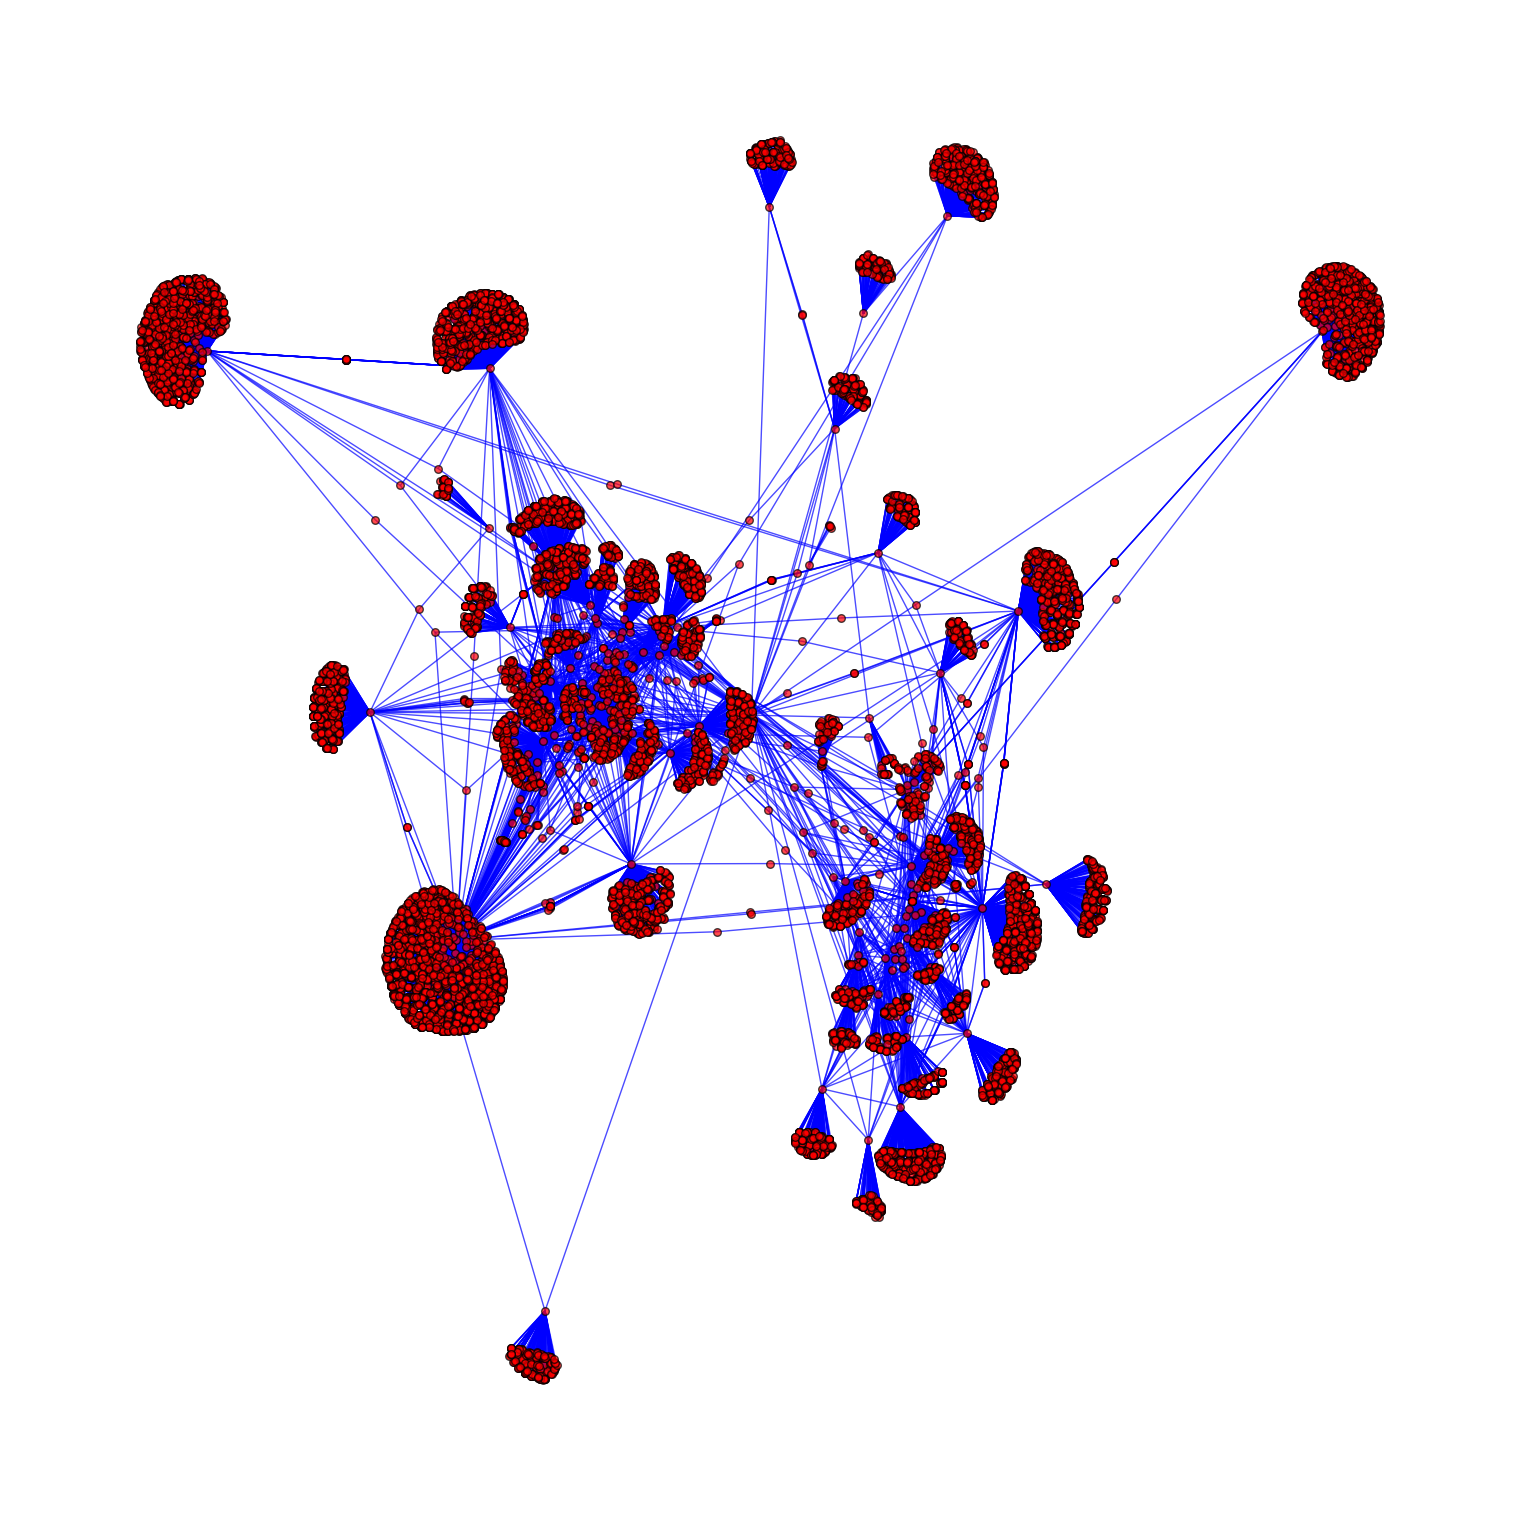

In [27]:
G = nx.Graph()
nodes = data[1].unique()
edges = data.values
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(figsize=(15, 15))
nx.draw(G, node_size=30, pos=nx.spring_layout(G), node_color='r', edge_color='b', alpha=0.7, edgecolors='k') #font_weight='bold', font_size=5, with_labels=True,